In [12]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv("/home/kduah/Desktop/Datain.csv") 

print(df.shape)

df.describe().transpose()

(13131, 15)


,count,mean,std,min,25%,50%,75%,max
DEPTH,13131.0,2598.337597,615.283554,1524.000000,2067.991800,2629.357200,3134.334600,3635.654400
CALI,13131.0,12.537325,2.107427,8.643100,11.030600,12.104500,13.873200,20.282900
GR,13131.0,87.235983,24.441441,28.004200,62.991050,98.395800,106.991700,131.366500
ILD,13131.0,2.383127,1.089810,0.581700,1.735400,2.218900,2.850300,9.117600
ITT,13131.0,0.095339,0.014940,0.059600,0.086300,0.091000,0.096800,0.180500
LLD,13131.0,2.396797,1.323735,0.597000,1.603350,2.171200,2.819900,28.348200
LLS,13131.0,2.667173,1.385152,0.675300,1.801850,2.447700,3.200650,29.775900
MSFL,13131.0,2.561160,2.395647,0.209000,1.171900,1.806700,3.515500,75.173600
NPHI,13131.0,0.257420,0.065861,0.037200,0.210700,0.243500,0.285300,0.490900
RHOB,13131.0,2.418670,0.121271,1.750600,2.356250,2.440400,2.503650,2.692100


In [5]:
X = df[['NPHI', 'RHOB', 'GR', 'LLD','LLS']]

y = df['Vs(m/s)'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

print(X_train.shape); print(X_test.shape)

(9191, 5)
(3940, 5)


In [6]:
# Define model

model = Sequential()

model.add(Dense(500, input_dim=5, activation= "relu"))

model.add(Dense(100, activation= "relu"))

model.add(Dense(50, activation= "relu"))

model.add(Dense(1))

#model.summary() #Print model Summary

2022-08-11 13:33:30.591382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-11 13:33:30.591453: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-11 13:33:30.591509: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kduah-Lenovo-ideapad-330-15IKB): /proc/driver/nvidia/version does not exist
2022-08-11 13:33:30.605280: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
%%time
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
288/288 [==============================] - 2s 3ms/step - loss: 1.1406 - mean_squared_error: 1.1406
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4456 - mean_squared_error: 0.4456
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.3119 - mean_squared_error: 0.3119
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.3044 - mean_squared_error: 0.3044
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2557 - mean_squared_error: 0.2557
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2489 - mean_squared_error: 0.2489
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2554 - mean_squared_error: 0.2554
Epoch 8/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2289 - mean_squared_error: 0.2289
Epoch 9/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2234 - mean_squared_error: 0.2234
Epoch 10/5

In [15]:
#%%time
pred_train= model.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train)))


pred= model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred)))

288/288 [==============================] - 0s 1ms/step
0.38922574428645634
124/124 [==============================] - 0s 1ms/step
0.3924976018054653


In [10]:
#model to reproduce same

In [9]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': pred.squeeze(), 'Difference':y_test-pred.squeeze()})

In [10]:
print(df_preds)

         Actual  Predicted  Difference
10070  9.375163   8.947735    0.427428
10471  8.099131   8.415720   -0.316589
1416   6.070563   5.641385    0.429178
848    4.325563   5.157147   -0.831584
8600   8.010272   8.059970   -0.049698
...         ...        ...         ...
9889   8.672082   8.747651   -0.075569
5819   7.884990   8.352706   -0.467716
2865   7.653750   7.811609   -0.157860
10479  8.139198   8.292727   -0.153528
2314   6.846802   7.277314   -0.430512

[3940 rows x 3 columns]


[Text(0.5, 1.0, 'Actual vs Predicted for Keras')]

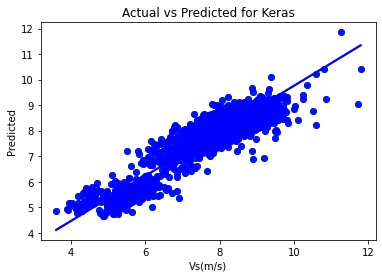

In [14]:
plt.scatter(y_test,pred);
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test, y=pred, ci=None, color='blue').set(title="Actual vs Predicted for Keras")
plt.annotate("R^2 = {:.3f}".format(r2_score(y_test, y_pred)), (9,12))
